In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Load dataset:
data = datasets.load_breast_cancer()
class_names = [str(x) for x in data.target_names]
feature_names = [str(x) for x in data.feature_names]
print(f"class_names: {class_names}")
print(f"feature_names: {feature_names}")

X, y = data.data, data.target
X = scaler.fit_transform(X)

## Pulsar start predition dataset
# dataset = pd.read_csv("pulsar_stars.csv")
# cols = [col for col in list(dataset.columns) if 'target_class' not in col]
# X = scaler.fit_transform(dataset[cols])
# X = dataset.drop(['target_class'], axis=1)
# y = dataset['target_class']
# class_names = ['not_pulsar', 'pulsar']

## Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"Data Stats: {X.shape}, {y.shape}, {collections.Counter(y)}")
print(f"Train Stats: {X_train.shape}, {y_train.shape}, {collections.Counter(y_train)}")
print(f"Test Stats: {X_test.shape}, {y_test.shape}, {collections.Counter(y_test)}")

class_names: ['malignant', 'benign']
feature_names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Data Stats: (569, 30), (569,), Counter({1: 357, 0: 212})
Train Stats: (398, 30), (398,), Counter({1: 249, 0: 149})
Test Stats: (171, 30), (171,), Counter({1: 108, 0: 63})


In [3]:
from gridsearch_classification import gridsearch_classification

save_dir = "gridsearch_results"
os.makedirs(save_dir, exist_ok=True)
best_model, grid_search_results = gridsearch_classification(X=X_train,                    # dataset
                                                            gt_labels=y_train,            # ground truth labels
                                                            best_model_metric="F1",       # metric to use to choose the best model
                                                            show=True,                    # whether to display the plots; this is used in a notebook
                                                            save=True, save_dir=save_dir  # whether to save the plots
                                                        )
print("Best model: ", best_model.__class__.__name__)
print("Best model params: ", best_model.get_params())

sklearn version: 1.4.2
No. of classes: 2
Class counts: Counter({1: 249, 0: 149})
Search space:
[[LogisticRegression(),
  {'C': [1, 2, 4],
   'fit_intercept': [True, False],
   'penalty': ['l2', 'elasticnet']}],
 [DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random']}],
 [ExtraTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random']}],
 [GaussianNB(), {}],
 [KNeighborsClassifier(),
  {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
   'n_neighbors': [1, 5, 10],
   'p': [1, 2],
   'weights': ['uniform', 'distance']}],
 [RandomForestClassifier(),
  {'bootstrap': [True, False],
   'criterion': ['gini', 'entropy', 'log_loss'],
   'n_estimators': [10, 50, 100, 200]}],
 [ExtraTreesClassifier(),
  {'bootstrap': [True, False],
   'criterion': ['gini', 'entropy', 'log_loss'],
   'n_estimators': [10, 50, 100, 200]}]]



  0%|          | 0/7 [00:00<?, ?it/s]

Searching for best hyperparameters for LogisticRegression...
Available parameters: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']
But only searching for parameters: ['penalty', 'fit_intercept', 'C']


 14%|█▍        | 1/7 [00:02<00:12,  2.15s/it]


Searching for best hyperparameters for DecisionTreeClassifier...
Available parameters: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter']
But only searching for parameters: ['criterion', 'splitter']


 29%|██▊       | 2/7 [00:03<00:07,  1.40s/it]


Searching for best hyperparameters for ExtraTreeClassifier...
Available parameters: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter']
But only searching for parameters: ['criterion', 'splitter']


 43%|████▎     | 3/7 [00:03<00:04,  1.16s/it]


Searching for best hyperparameters for GaussianNB...
Available parameters: ['priors', 'var_smoothing']
But only searching for parameters: []


 57%|█████▋    | 4/7 [00:04<00:03,  1.03s/it]


Searching for best hyperparameters for KNeighborsClassifier...
Available parameters: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
But only searching for parameters: ['n_neighbors', 'weights', 'algorithm', 'p']


 71%|███████▏  | 5/7 [00:05<00:02,  1.04s/it]


Searching for best hyperparameters for RandomForestClassifier...
Available parameters: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
But only searching for parameters: ['n_estimators', 'criterion', 'bootstrap']


 86%|████████▌ | 6/7 [00:08<00:01,  1.44s/it]


Searching for best hyperparameters for ExtraTreesClassifier...
Available parameters: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
But only searching for parameters: ['n_estimators', 'criterion', 'bootstrap']


100%|██████████| 7/7 [00:09<00:00,  1.40s/it]


Best model:  DecisionTreeClassifier
Best model params:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [4]:
print(list(grid_search_results.keys()))
cols2keep = [col for col in grid_search_results[f"{best_model.__class__.__name__}"].columns if 'param_' in col or col in ['mean_test_F1', 'std_test_F1']]
grid_search_results[f"{best_model.__class__.__name__}"][cols2keep]

['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreeClassifier', 'GaussianNB', 'KNeighborsClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier']


param_criterion param_splitter  mean_test_F1  std_test_F1
0            gini           best           1.0          0.0
1            gini         random           1.0          0.0
2         entropy           best           1.0          0.0
3         entropy         random           1.0          0.0
4        log_loss           best           1.0          0.0
5        log_loss         random           1.0          0.0

In [5]:
## Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

### Evaluate predictions on test set

sklearn version: 1.4.2
scikitplot version: 0.3.7
Saving results in /data/home/rgura001/clfutils4r/src/clfutils4r/test_results
                    precision    recall  f1-score     support
malignant(class 0)   0.869565  0.952381  0.909091   63.000000
benign(class 1)      0.970588  0.916667  0.942857  108.000000
accuracy             0.929825  0.929825  0.929825    0.929825
macro avg            0.920077  0.934524  0.925974  171.000000
weighted avg         0.933369  0.929825  0.930417  171.000000


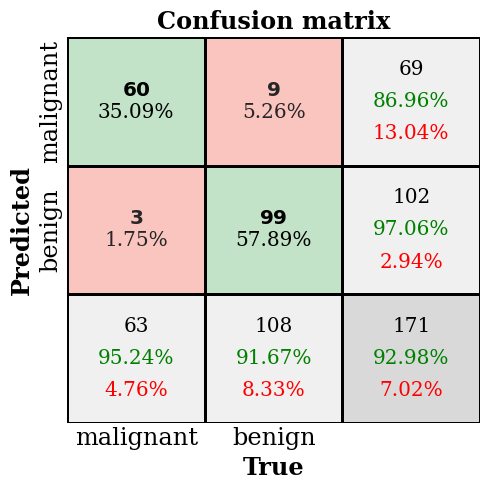

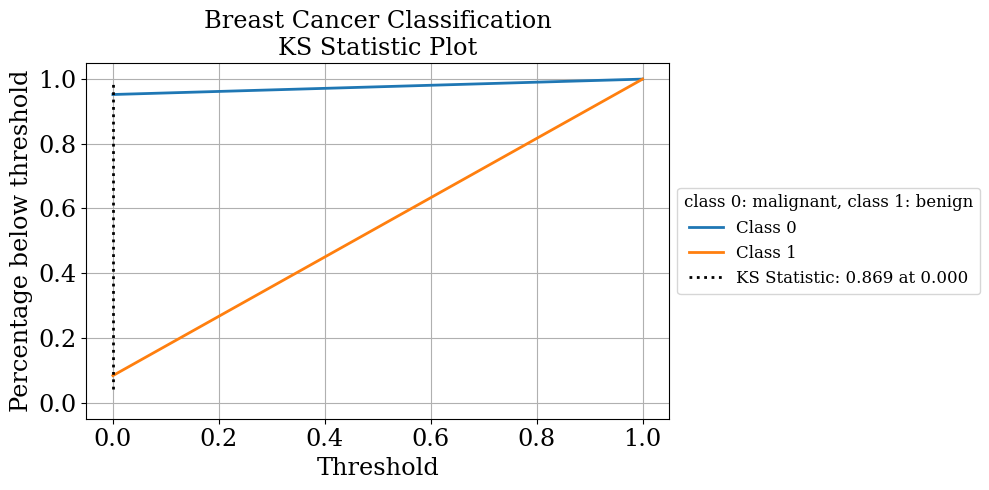

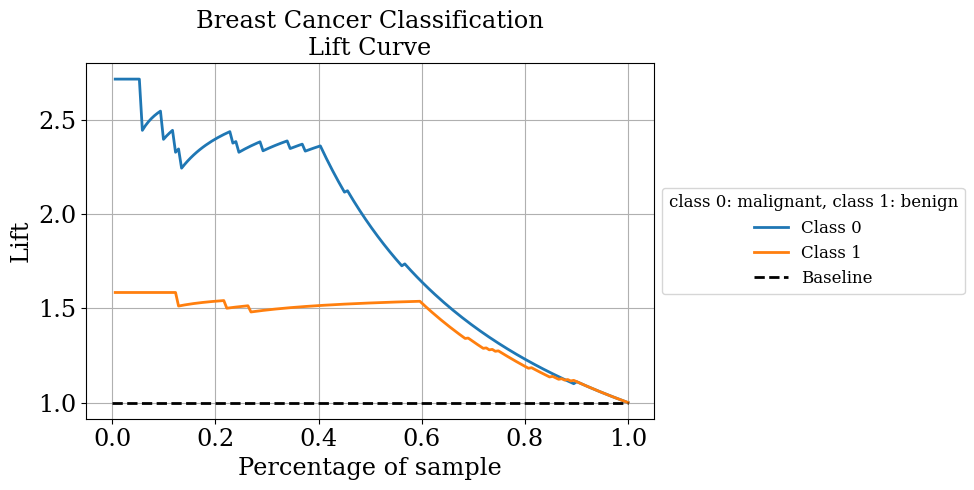

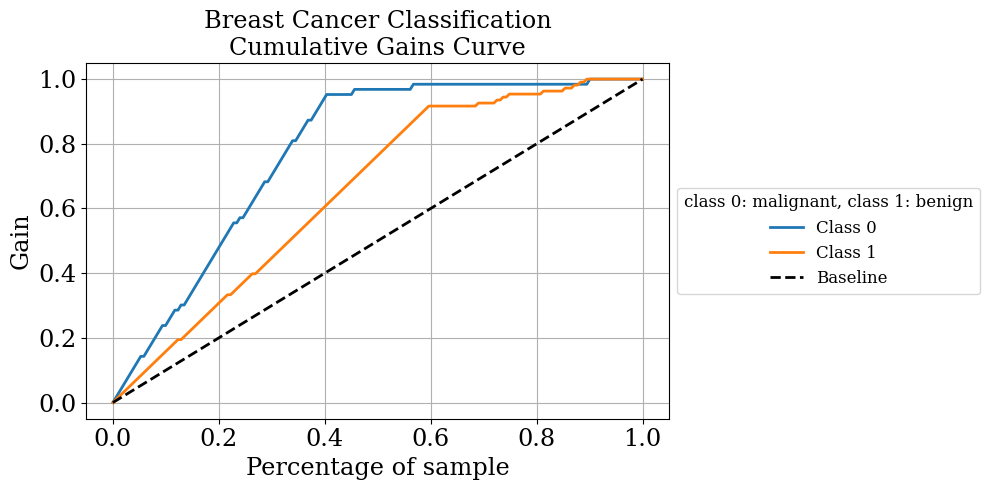

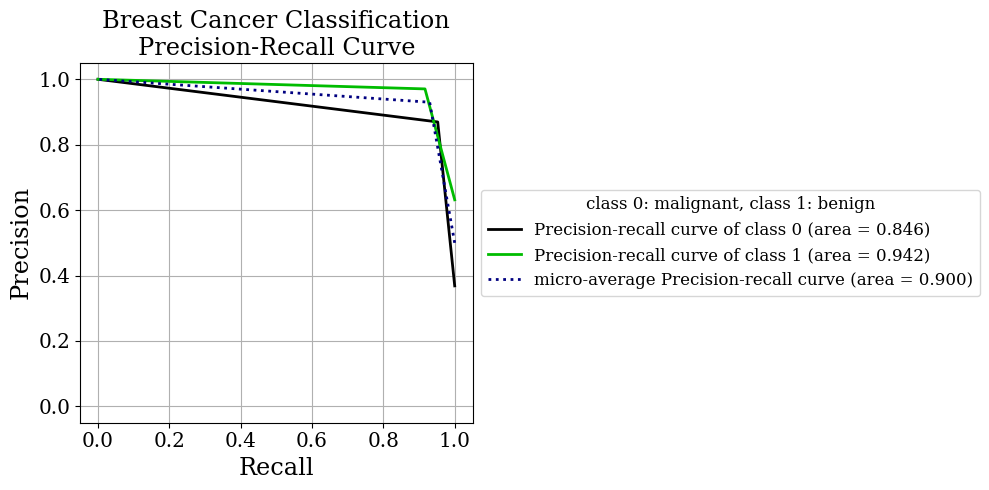

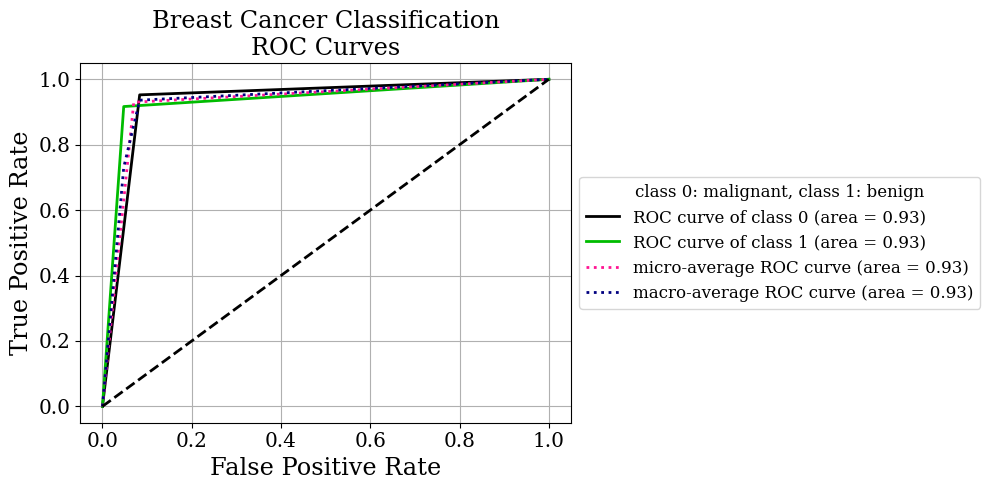

In [6]:
## Evaluate model
from eval_classification import eval_classification
## Make metrics plots
eval_classification(make_metrics_plots=True, y_test=y_test, y_pred=y_pred, y_pred_proba=y_pred_proba,  
                    class_names=class_names, feature_names=feature_names,
                    titlestr="Breast Cancer Classification",
                    show=True, save=True, RESULTS_DIR=os.getcwd()+'/test_results')

### Calibration Plots

Saving results in /data/home/rgura001/clfutils4r/src/clfutils4r/test_results
Generating Calibration Curves...
	Training classifier:  RandomForestClassifier
	Training classifier:  DecisionTreeClassifier
	Training classifier:  GaussianNB
	Training classifier:  LogisticRegression


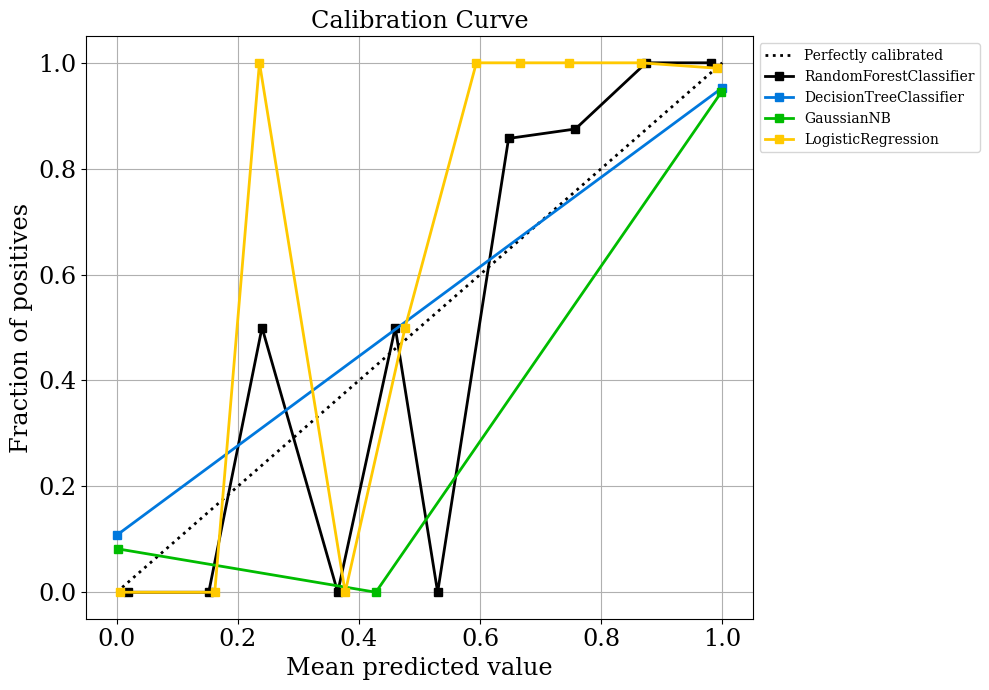

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

untrained_models_list, \
    untrained_models_names = [RandomForestClassifier(),
                                DecisionTreeClassifier(),
                                GaussianNB(),
                                LogisticRegression().set_params(**{'max_iter':1000}),
                                
                            ],\
                                ['RandomForestClassifier', 
                                'DecisionTreeClassifier', 
                                'GaussianNB',
                                'LogisticRegression',
                            ]

from eval_classification import eval_classification
eval_classification(
                    make_calibration_curves=True, untrained_models_list=untrained_models_list, untrained_models_names=untrained_models_names,
                    X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,
                    class_names=class_names, feature_names=feature_names,
                    # titlestr="Breast Cancer Detection using Decision Tree Classifier",
                    show=True, save=True, RESULTS_DIR=os.getcwd()+'/test_results'
                )

### Shapley Plots

Saving results in /data/home/rgura001/clfutils4r/src/clfutils4r/test_results
No. of samples used to build explainer and generate shap values:  100


  0%|          | 0/171 [00:00<?, ?it/s]

100%|██████████| 171/171 [00:14<00:00, 12.14it/s]


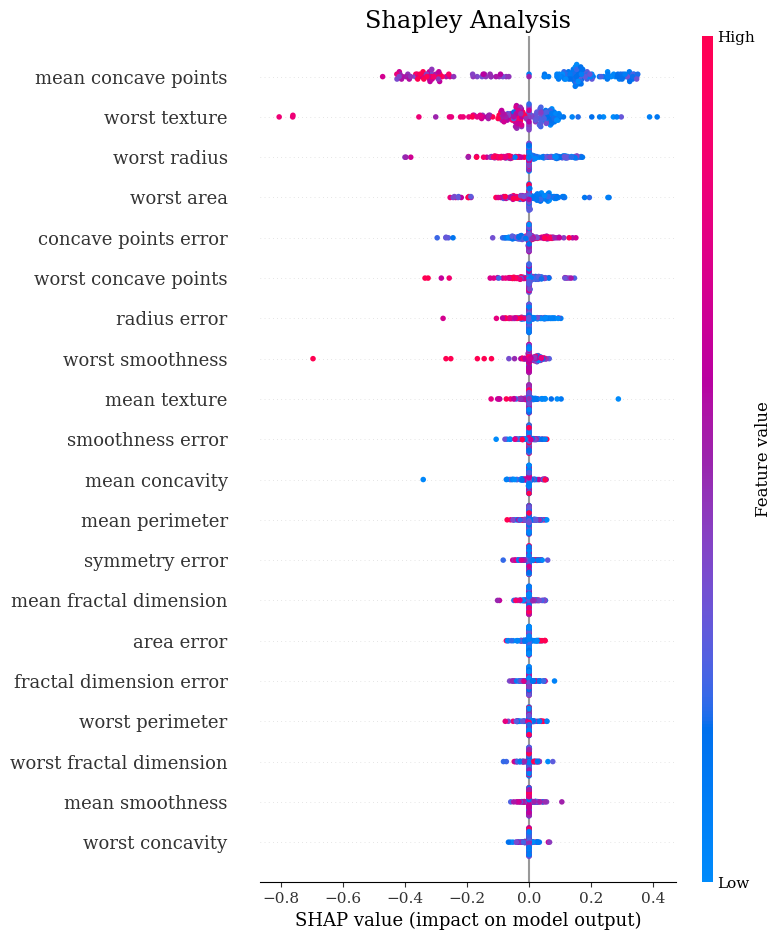

In [8]:
from eval_classification import eval_classification
eval_classification(
                    make_shap_plot=True, shap_nsamples=100,
                    trained_model=best_model, X_train=X_train, X_test=X_test, 
                    class_names=class_names, feature_names=feature_names,
                    # titlestr="Breast Cancer Detection using Decision Tree Classifier",
                    show=True, save=True, RESULTS_DIR=os.getcwd()+'/test_results'
                )

### What do the plots look like for ideal predictions

In [9]:
from sklearn.preprocessing import OneHotEncoder
y_pred_proba_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()

Saving results in /data/home/rgura001/clfutils4r/src/clfutils4r/ideal_results
                   precision  recall  f1-score  support
negative(class 0)        1.0     1.0       1.0     63.0
positive(class 1)        1.0     1.0       1.0    108.0
accuracy                 1.0     1.0       1.0      1.0
macro avg                1.0     1.0       1.0    171.0
weighted avg             1.0     1.0       1.0    171.0


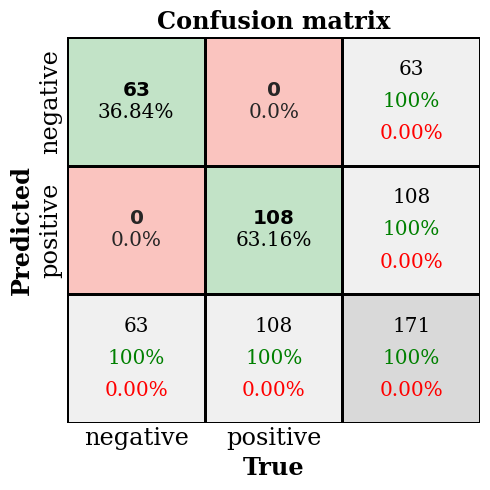

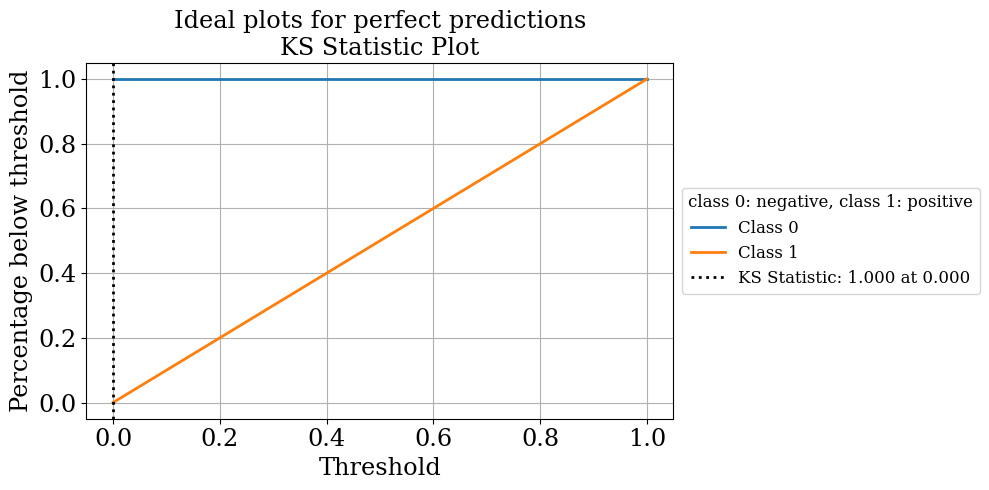

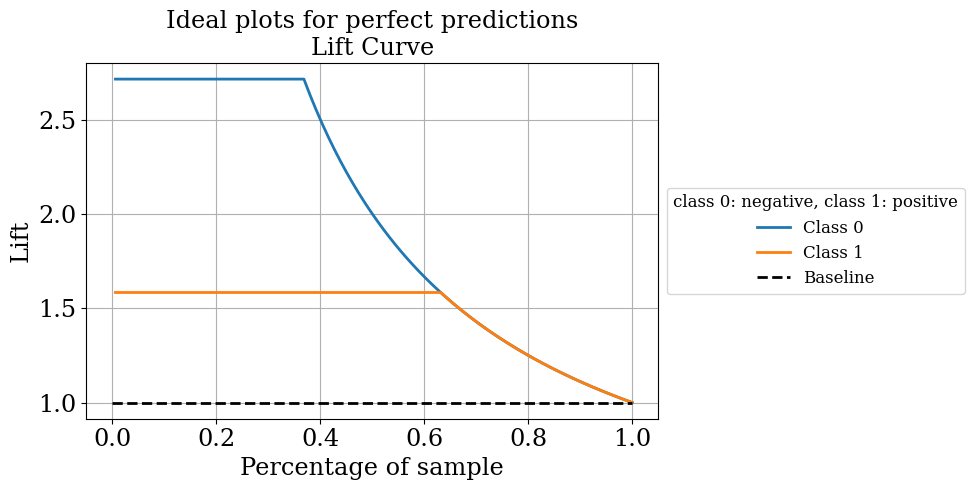

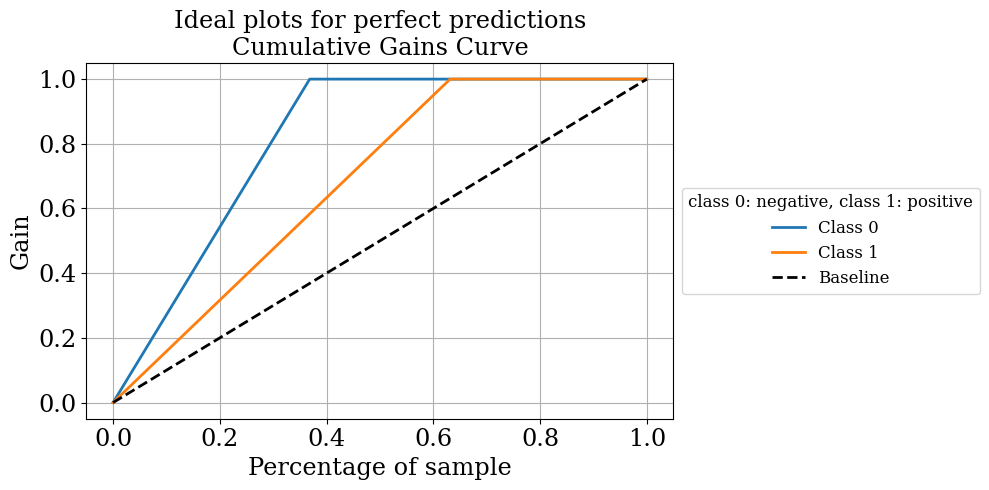

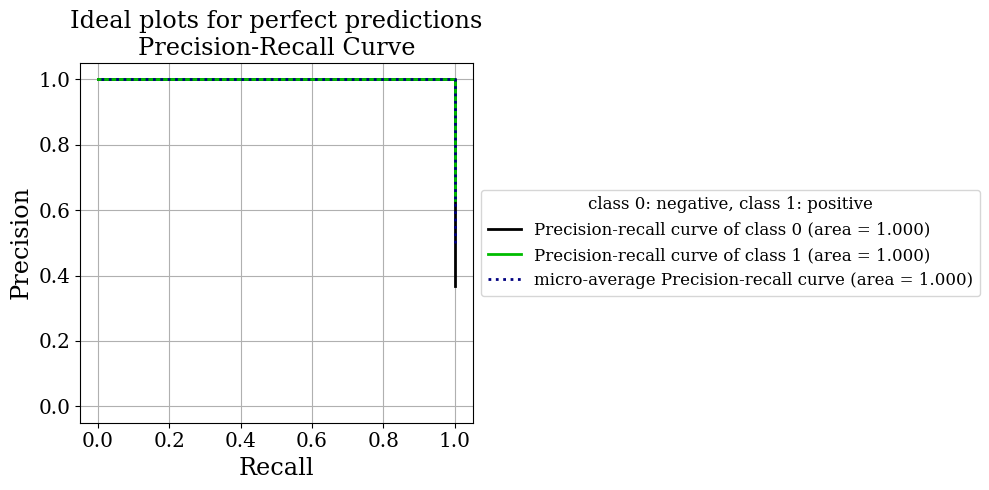

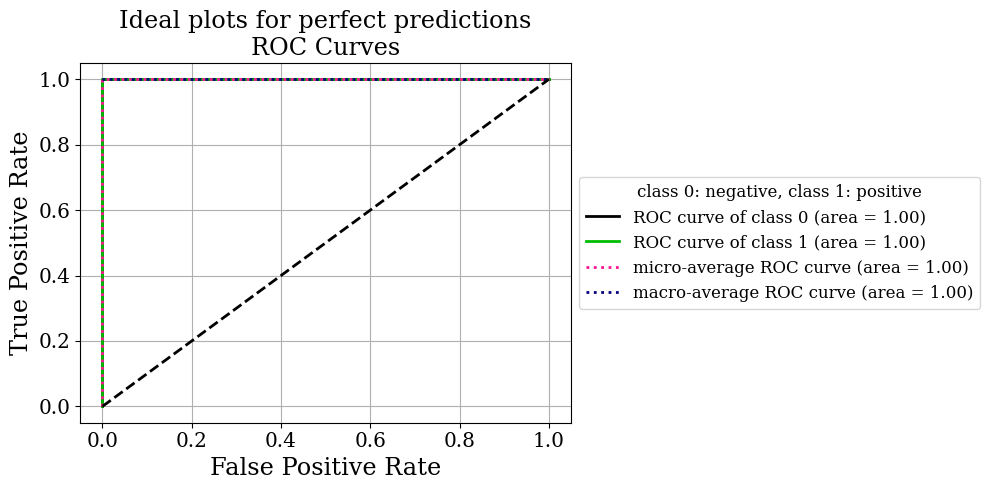

In [10]:
from eval_classification import eval_classification
eval_classification(make_metrics_plots=True, y_test=y_test, 
                    y_pred=y_test, y_pred_proba=y_pred_proba_dummy, 
                    # untrained_model=best_model.set_params(**best_model.get_params()), X=X, y=y, n_splits=3, 
                    class_names=['negative', 'positive'], 
                    titlestr="Ideal plots for perfect predictions",
                    show=True, save=True, RESULTS_DIR=os.getcwd()+'/ideal_results')